# Chapter 3: Summarizing data

In [1]:
library(tidyverse)
library(cowplot)
library(knitr)
options(digits = 2)
theme_set(theme_minimal(base_size = 14))

# load the NHANES data library
library(NHANES)

# drop duplicated IDs within the NHANES dataset
NHANES <-
  NHANES %>%
  distinct(ID, .keep_all = TRUE)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Table 3.1

In [2]:
# summarize physical activity data

PhysActive_table <- NHANES %>%
  dplyr::select(PhysActive) %>% # select the variable
  group_by(PhysActive) %>% # group by values of the variable
  summarize(AbsoluteFrequency = n()) # count the values

kable(PhysActive_table, digits=3, caption='Frequency distribution for PhysActive variable', booktabs = TRUE)



Table: Frequency distribution for PhysActive variable

|PhysActive | AbsoluteFrequency|
|:----------|-----------------:|
|No         |              2473|
|Yes        |              2972|
|NA         |              1334|

## Table 3.2

In [3]:
# compute percentages for physical activity categories

PhysActive_table_filtered <- NHANES %>%
  drop_na(PhysActive) %>%
  dplyr::select(PhysActive) %>%
  group_by(PhysActive) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(
    RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency),
    Percentage = RelativeFrequency * 100
  )

kable(PhysActive_table_filtered, caption='Absolute and relative frequencies and percentages for PhysActive variable')



Table: Absolute and relative frequencies and percentages for PhysActive variable

|PhysActive | AbsoluteFrequency| RelativeFrequency| Percentage|
|:----------|-----------------:|-----------------:|----------:|
|No         |              2473|              0.45|         45|
|Yes        |              2972|              0.55|         55|

## Table 3.3

In [4]:
# create summary table for relative frequency of different
# values of SleepHrsNight

sleepTable <- NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight) %>%
  group_by(SleepHrsNight) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(
    RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency),
    Percentage = RelativeFrequency * 100
  )

kable(sleepTable, caption='Frequency distribution for number of hours of sleep per night in the NHANES dataset')



Table: Frequency distribution for number of hours of sleep per night in the NHANES dataset

| SleepHrsNight| AbsoluteFrequency| RelativeFrequency| Percentage|
|-------------:|-----------------:|-----------------:|----------:|
|             2|                 9|              0.00|       0.18|
|             3|                49|              0.01|       0.97|
|             4|               200|              0.04|       3.97|
|             5|               406|              0.08|       8.06|
|             6|              1172|              0.23|      23.28|
|             7|              1394|              0.28|      27.69|
|             8|              1405|              0.28|      27.90|
|             9|               271|              0.05|       5.38|
|            10|                97|              0.02|       1.93|
|            11|                15|              0.00|       0.30|
|            12|                17|              0.00|       0.34|

## Figure 3.2

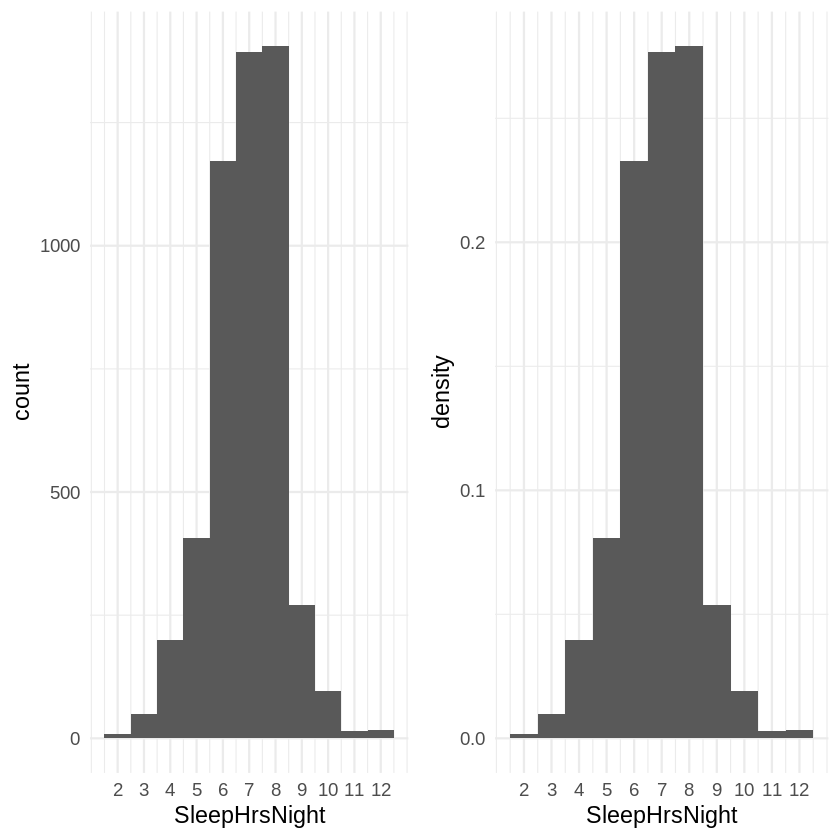

In [5]:
SleepHrsNight_data_filtered <-
  NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight)

# setup breaks for sleep variable
scalex <-
  scale_x_continuous(
    breaks = c(
      min(NHANES$SleepHrsNight, na.rm = TRUE):max(NHANES$SleepHrsNight, na.rm = TRUE)
    )
  ) # set the break points in the graph

p1 <- SleepHrsNight_data_filtered %>%
  ggplot(aes(SleepHrsNight)) +
  geom_histogram(binwidth = 1) +
  scalex

p2 <- SleepHrsNight_data_filtered %>%
  ggplot(aes(SleepHrsNight)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1) +
  scalex

plot_grid(p1,p2)

## Table 3.4

In [10]:
# create cumulative frequency distribution of SleepHrsNight data

SleepHrsNight_cumulative <-
  NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight) %>%
  group_by(SleepHrsNight) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(CumulativeFrequency = cumsum(AbsoluteFrequency))

kable(SleepHrsNight_cumulative, caption='Absolute and cumulative frquency distributions for SleepHrsNight variable')



Table: Absolute and cumulative frquency distributions for SleepHrsNight variable

| SleepHrsNight| AbsoluteFrequency| CumulativeFrequency|
|-------------:|-----------------:|-------------------:|
|             2|                 9|                   9|
|             3|                49|                  58|
|             4|               200|                 258|
|             5|               406|                 664|
|             6|              1172|                1836|
|             7|              1394|                3230|
|             8|              1405|                4635|
|             9|               271|                4906|
|            10|                97|                5003|
|            11|                15|                5018|
|            12|                17|                5035|

## Figure 3.3

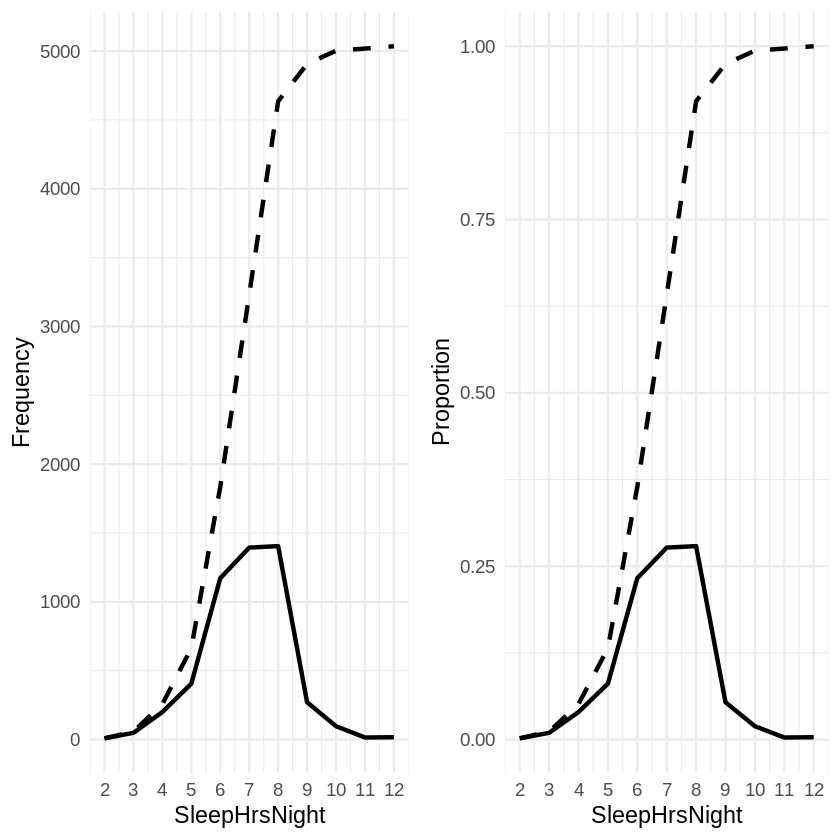

In [11]:
p1 <- SleepHrsNight_cumulative %>%
  ggplot(aes(SleepHrsNight, AbsoluteFrequency)) +
  geom_line(linewidth = 1.25) +
  geom_line(
    aes(SleepHrsNight, CumulativeFrequency),
    linetype = "dashed",
    linewidth = 1.25
  ) +
  scalex +
  labs(y = "Frequency")

SleepHrsNight_cumulative <-
  NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight) %>%
  group_by(SleepHrsNight) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(
    RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency),
    CumulativeDensity = cumsum(RelativeFrequency)
  )

p2 <- SleepHrsNight_cumulative %>%
  ggplot(aes(SleepHrsNight, RelativeFrequency)) +
  geom_line( size = 1.25) +
  geom_line(
    aes(SleepHrsNight, CumulativeDensity),
    linetype = "dashed",
    linewidth = 1.25) +
  scalex +
  labs(
    y = "Proportion"
  )

plot_grid(p1,p2)

## Figure 3.4

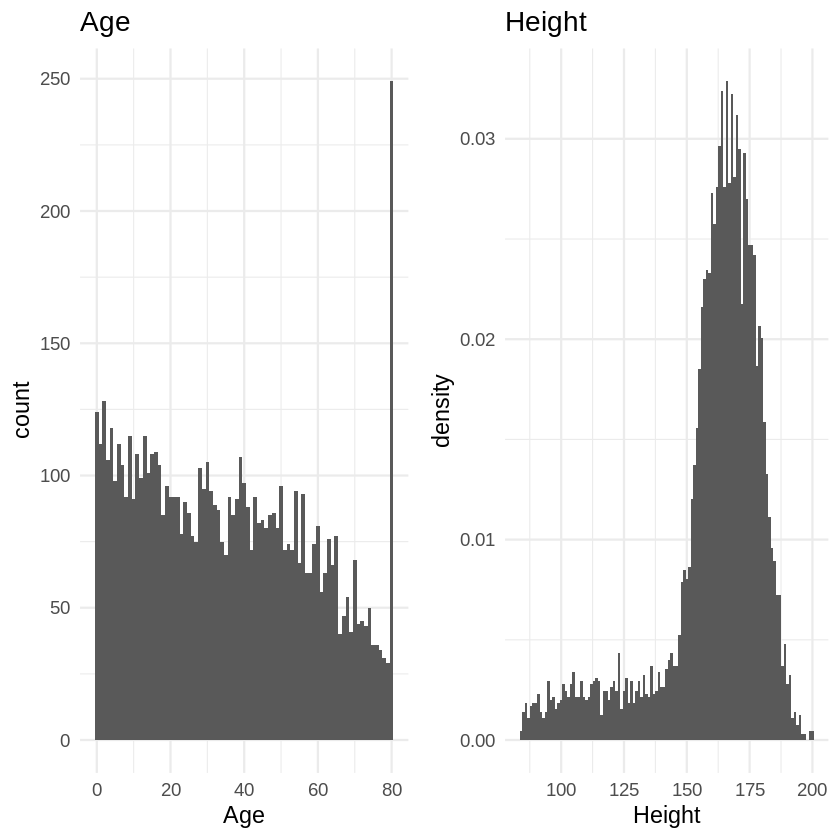

In [13]:
p1 <- NHANES %>%
  ggplot(aes(Age)) +
  geom_histogram(binwidth = 1) +
  ggtitle('Age')

p2 <- NHANES %>%
  select(Height) %>%
  drop_na() %>%
  ggplot(aes(Height)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1) +
  ggtitle('Height')

plot_grid(p1,p2)

## Figure 3.5

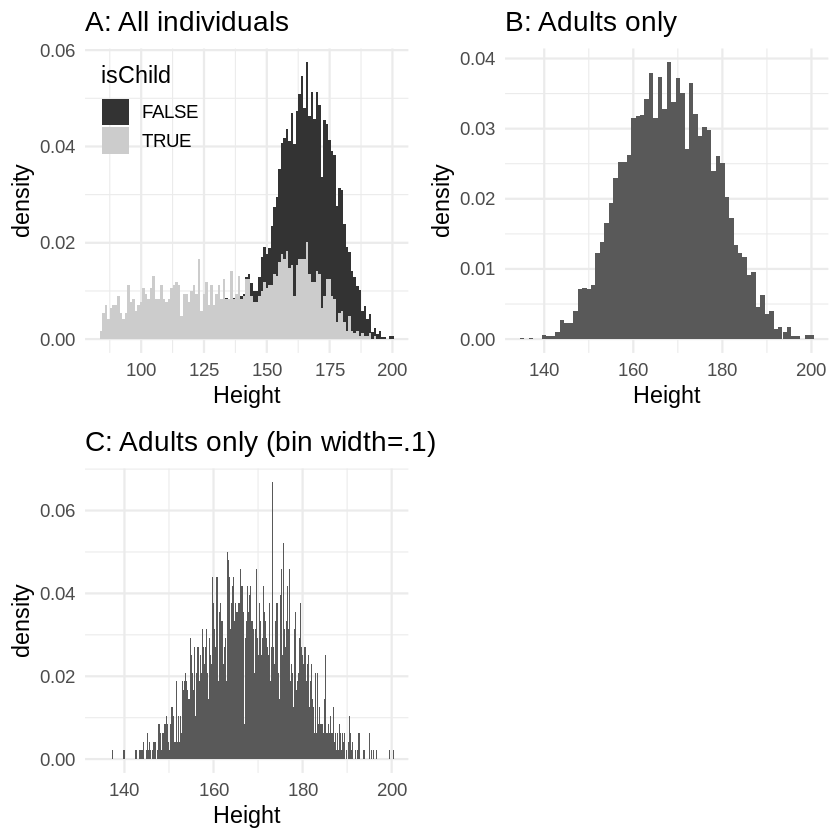

In [14]:
# first create a new variable in NHANES that tell us whether
# each individual is a child
NHANES <-
  NHANES %>%
  mutate(isChild = Age < 18)

NHANES_adult <-
  NHANES %>%
  drop_na(Age, Height) %>%
  dplyr::filter(Age > 17)


p1 <- NHANES %>%
  dplyr::select(Height, isChild) %>%
  drop_na() %>%
  ggplot(aes(Height, fill = isChild)) +
  scale_fill_grey() +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1) +
  theme(legend.position = c(0.2,0.8)) +
  ggtitle('A: All individuals')

p2 <- NHANES_adult %>%
  ggplot(aes(Height)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1) +
  ggtitle('B: Adults only')


p3 <- NHANES_adult %>%
  drop_na(Height) %>%
  ggplot(aes(Height)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = .1) +
  ggtitle('C: Adults only (bin width=.1)')

plot_grid(p1,p2,p3,ncol=2)

## Table 3.5

In [10]:
# take a slice of a few values from the full data frame
nhanes_slice <- NHANES_adult %>%
  dplyr::select(Height) %>%
  slice(45:50)

kable(nhanes_slice %>% mutate(Height=formatC(Height, digits=1, format='f')), caption='A few values of Height from the NHANES data frame.', digits=1)



|Height |
|:------|
|169.6  |
|169.8  |
|167.5  |
|155.2  |
|173.8  |
|174.5  |

## Figure 3.6

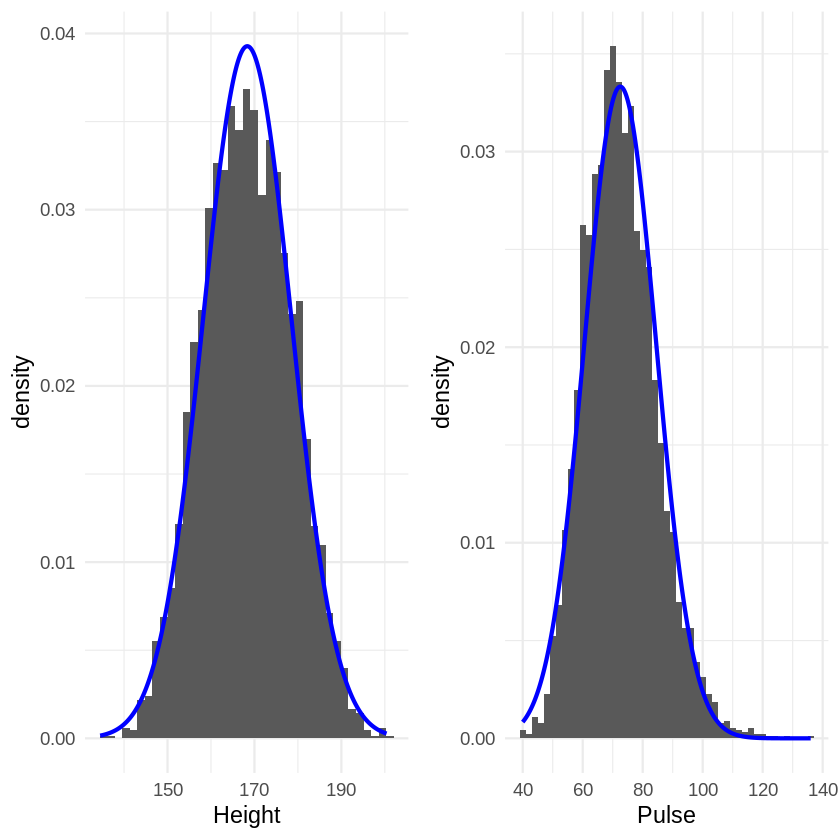

In [15]:
# first update the summary to include the mean and standard deviation of each
# dataset

pulse_summary <-
  NHANES_adult %>%
  drop_na(Pulse) %>%
  summarize(
    nbins = nclass.FD(Pulse),
    maxPulse = max(Pulse),
    minPulse = min(Pulse),
    meanPulse = mean(Pulse), #computing mean
    sdPulse = sd(Pulse) #computing SD
  )

height_summary <-
  NHANES_adult %>%
  drop_na(Height) %>%
  summarize(
    nbins = nclass.FD(Height),
    maxHeight = max(Height),
    minHeight = min(Height),
    binwidth = (maxHeight - minHeight) / nbins,
    meanHeight = mean(Height), #computing mean
    sdHeight = sd(Height) #computing SD
  )

# create data for plotting normal distribution curves data based on our computed means and SDs
heightDist <-
  tibble(
    x = seq(height_summary$minHeight, height_summary$maxHeight, 0.1)
  ) %>%
  mutate(
    y = dnorm(
      x,
      mean = height_summary$meanHeight,
      sd = height_summary$sdHeight
    )
  )

pulseDist <-
  tibble(
    x = seq(pulse_summary$minPulse, pulse_summary$maxPulse, 0.1)
  ) %>%
  mutate(
    y = dnorm(
      x,
      mean = pulse_summary$meanPulse,
      sd = pulse_summary$sdPulse)
  )

#plot the normal distribution curves on top of histograms of the data
h1 <-
  NHANES_adult %>%
  drop_na(Height) %>%
  ggplot(aes(Height)) +
  geom_histogram(
    aes(y = ..density..),
    binwidth = height_summary$binwidth
  ) +
  geom_line(
    data = heightDist,
    aes(x = x, y = y),
    color = "blue",
    linewidth = 1.2
  )

h2 <-
  NHANES_adult %>%
  drop_na(Pulse) %>%
  ggplot(aes(Pulse)) +
  geom_histogram(
    aes(y = ..density..),
    binwidth = 2
  ) +
  geom_line(
    data = pulseDist,
    aes(x = x, y = y),
    color = "blue",
    linewidth = 1.2
  )

plot_grid(h1, h2)

## Figure 3.7

Rows: 5028 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): waittime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


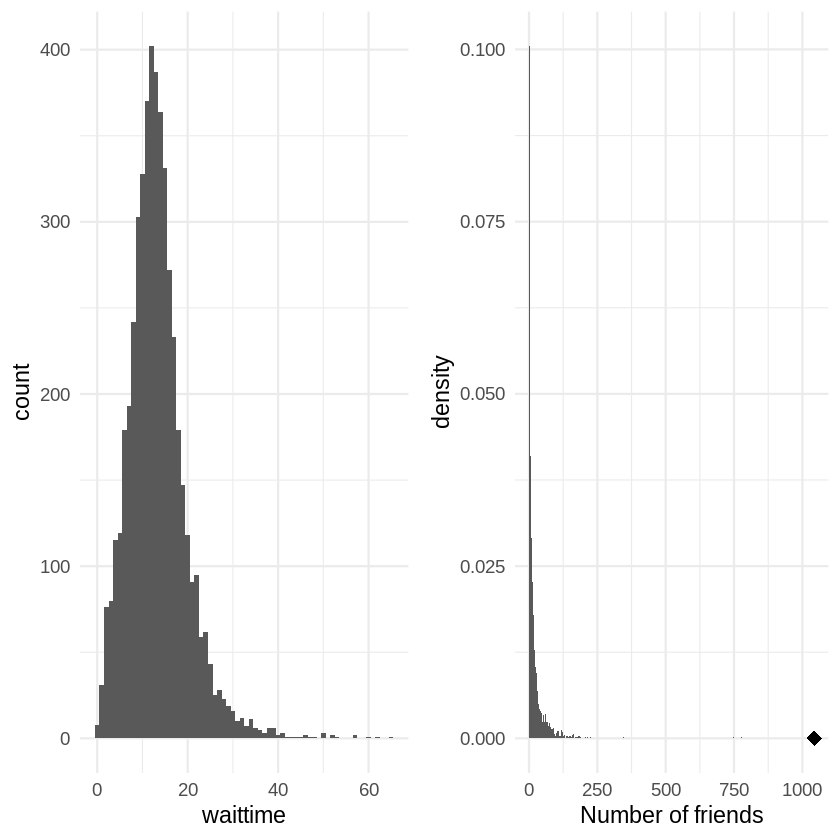

In [16]:
waittimes <-
  read_csv("https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/04/sfo_wait_times_2017.csv")

p1 <- waittimes %>%
  ggplot(aes(waittime)) +
  geom_histogram(binwidth = 1)

fbdata <-
  read.table("https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/04/facebook_combined.txt")

# count how many friends each individual has
friends_table <-
  fbdata %>%
  group_by(V1) %>%
  summarize(nfriends = n())

p2 <- friends_table %>%
  ggplot(aes(nfriends)) +
  geom_histogram(aes(y = ..density..), binwidth = 2) +
  xlab("Number of friends") +
  annotate(
    "point",
    x = max(friends_table$nfriends),
    y = 0, shape=18,
    size = 4
  )
plot_grid(p1,p2)